In [1]:
#in this dataset, there are ten categories of items in the dataset. 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras

In [2]:
(X_train, y_train), (X_test, y_test)= datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

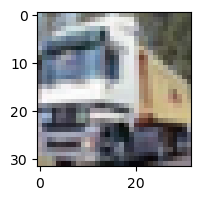

In [5]:
plt.figure(figsize= (15,2))
plt.imshow(X_train[1])

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_train.shape

(50000,)

In [9]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
def plot_sample (X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

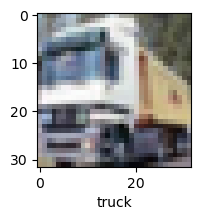

In [11]:
plot_sample(X_train, y_train, 1)

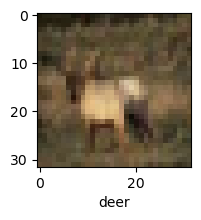

In [12]:
plot_sample(X_train, y_train, 3)

In [13]:
#Data normalization
X_train= X_train/255
X_test= X_test/255

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000,activation='relu'),
        layers.Dense(10, activation='sigmoid')
      ])
ann.compile(optimizer= 'SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 325s 206ms/step - loss: 1.8119 - accuracy: 0.3547
Epoch 2/5
1563/1563 [==============================] - 341s 218ms/step - loss: 1.6230 - accuracy: 0.4295
Epoch 3/5
1563/1563 [==============================] - 333s 213ms/step - loss: 1.5423 - accuracy: 0.4570
Epoch 4/5
1563/1563 [==============================] - 344s 220ms/step - loss: 1.4827 - accuracy: 0.4799
Epoch 5/5
1563/1563 [==============================] - 311s 199ms/step - loss: 1.4344 - accuracy: 0.4928


In [15]:
#the accuracy of this model is low
#therefore 
ann.evaluate(X_test, y_test)

313/313 [==============================] - 25s 77ms/step - loss: 1.5377 - accuracy: 0.4503


[1.5377376079559326, 0.450300008058548]

In [18]:
#classification report
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print ("Classification report:/n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 12s 38ms/step
Classification report:/n               precision    recall  f1-score   support

           0       0.49      0.49      0.49      1000
           1       0.74      0.37      0.49      1000
           2       0.39      0.22      0.28      1000
           3       0.40      0.17      0.24      1000
           4       0.36      0.47      0.41      1000
           5       0.46      0.29      0.36      1000
           6       0.34      0.82      0.48      1000
           7       0.59      0.48      0.53      1000
           8       0.46      0.76      0.57      1000
           9       0.63      0.44      0.52      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.44     10000
weighted avg       0.49      0.45      0.44     10000



In [22]:
#CNN: to improve the model's accuracy using convolutions addition
#Kernel=3 by 3 filter
cnn = models.Sequential([
        #cnn
        #dense
        layers.Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(32,32, 3)), 
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters=64, kernel_size= (3,3), activation= 'relu'), 
        layers.MaxPooling2D((2,2)),
    
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10,activation='softmax')
    ])

In [23]:
cnn.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 150s 94ms/step - loss: 1.4751 - accuracy: 0.4699
Epoch 2/10
1563/1563 [==============================] - 131s 84ms/step - loss: 1.1038 - accuracy: 0.6140
Epoch 3/10
1563/1563 [==============================] - 145s 93ms/step - loss: 0.9704 - accuracy: 0.6628
Epoch 4/10
1563/1563 [==============================] - 113s 72ms/step - loss: 0.8853 - accuracy: 0.6935
Epoch 5/10
1563/1563 [==============================] - 150s 96ms/step - loss: 0.8188 - accuracy: 0.7178
Epoch 6/10
1563/1563 [==============================] - 159s 101ms/step - loss: 0.7626 - accuracy: 0.7353
Epoch 7/10
1563/1563 [==============================] - 161s 103ms/step - loss: 0.7153 - accuracy: 0.7522
Epoch 8/10
1563/1563 [==============================] - 167s 107ms/step - loss: 0.6765 - accuracy: 0.7656
Epoch 9/10
1563/1563 [==============================] - 177s 114ms/step - loss: 0.6357 - accuracy: 0.7789
Epoch 10/10
1563/1563 [============================

In [26]:
cnn.evaluate (X_test, y_test)

313/313 [==============================] - 7s 20ms/step - loss: 0.9190 - accuracy: 0.7028


[0.9190314412117004, 0.7027999758720398]

In [27]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [28]:
#conversion into 1 dimension array
y_test= y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

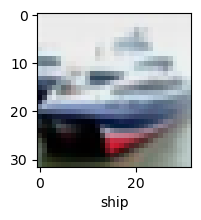

In [29]:
plot_sample (X_test, y_test, 1)

In [30]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 19ms/step


array([[7.47095619e-04, 6.15390090e-05, 1.13660214e-03, 9.11563039e-01,
        2.55104678e-04, 4.94186543e-02, 3.33311185e-02, 2.39836845e-06,
        2.77785212e-03, 7.06528604e-04],
       [6.09162124e-03, 9.10012517e-03, 1.24240914e-05, 7.07846993e-07,
        6.04707440e-09, 1.28221289e-09, 1.47383270e-08, 1.11937959e-09,
        9.84518528e-01, 2.76490784e-04],
       [3.96349877e-02, 2.12151315e-02, 6.97125506e-04, 3.69527843e-03,
        1.38079107e-03, 8.16211628e-04, 1.00873341e-03, 1.59773248e-04,
        9.28848982e-01, 2.54299585e-03],
       [9.59881425e-01, 8.38758191e-04, 9.20931716e-03, 9.90357832e-04,
        1.38154719e-03, 5.53344171e-06, 1.75823167e-04, 9.05991419e-06,
        2.74982043e-02, 9.88278862e-06],
       [1.12942089e-05, 9.14561824e-05, 4.24815938e-02, 1.14173889e-01,
        6.54282123e-02, 3.69899836e-03, 7.73930132e-01, 2.76183364e-05,
        4.63657743e-05, 1.10362154e-04]], dtype=float32)

In [31]:
#np.argmax([5,12,167,2])

In [32]:
#np.argmax(y_pred[0])

In [33]:
np.argmax([5,12,167,2])

2

In [34]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

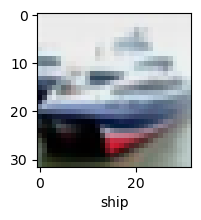

In [36]:
plot_sample (X_test, y_test, 1)

In [37]:
classes[y_classes[1]]

'ship'

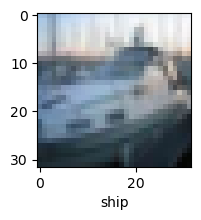

In [38]:
plot_sample (X_test, y_test, 2 )

In [39]:
classes[y_classes[2]]

'ship'